In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Zomato_data.csv')
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [ ]:
# This fuction will remove /5 from the rating and column and convert it to float

def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handleRate)

In [6]:
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


# What type of Restaurants do majority of the people like to eat?


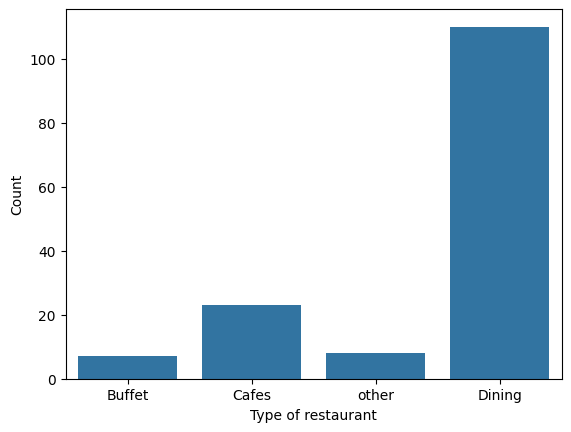

In [7]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of restaurant')
plt.ylabel('Count')
plt.show()

 Conclusion: Most of the restaurants are of type Casual Dining

In [8]:
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


# How many votes has each type of restaurant has received from customers

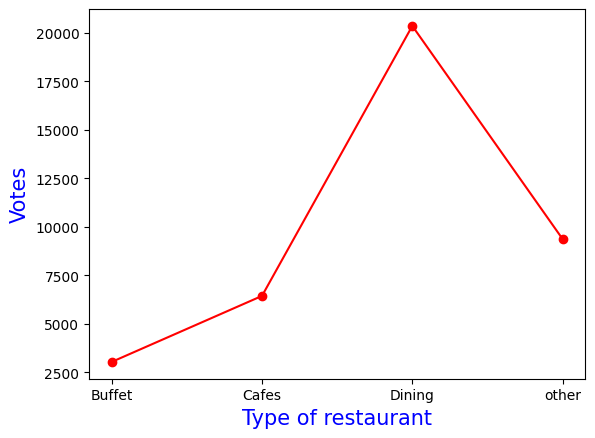

In [9]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
res = pd.DataFrame({'votes': grouped_data})
plt.plot(res, marker='o',c='r')
plt.xlabel('Type of restaurant',c='b',size=15)
plt.ylabel('Votes',c='b',size=15)
plt.show()

 Conclusion : Dinning restaurants has received maximum votes as compared to other types of restaurants.

In [10]:
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


# What are the ratings that the majority of the restaurants have received?

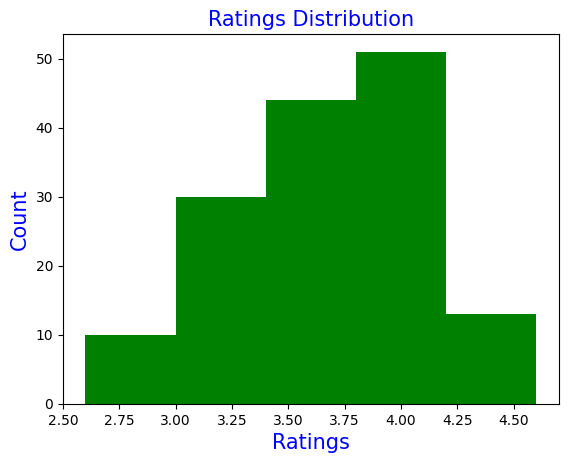

In [13]:
plt.hist(df['rate'], bins=5, color='green')
plt.title('Ratings Distribution',c='b',size=15)
plt.xlabel('Ratings',c='b',size=15)
plt.ylabel('Count',c='b',size=15)
plt.show()

 Conclusion : Most of the restaurants have received rating between 3.5 to 4.5

# Zomato has observed that most couple order most of their food online. What is their average spending on each oder?

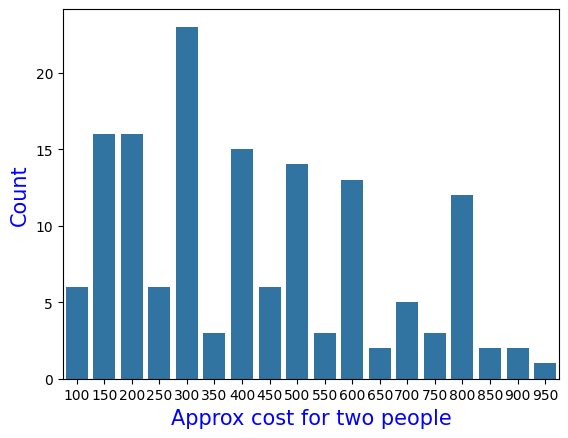

In [18]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.xlabel('Approx cost for two people',c='b',size=15)
plt.ylabel('Count',c='b',size=15)
plt.show()

Conclusion : Most of the couples have spent between 500 to 1500 rupees on their order.

The majority of couples prefferr resturants with an approximate cost of 300 rupees.

# What mode(online or offline) has received the maximum rating ?

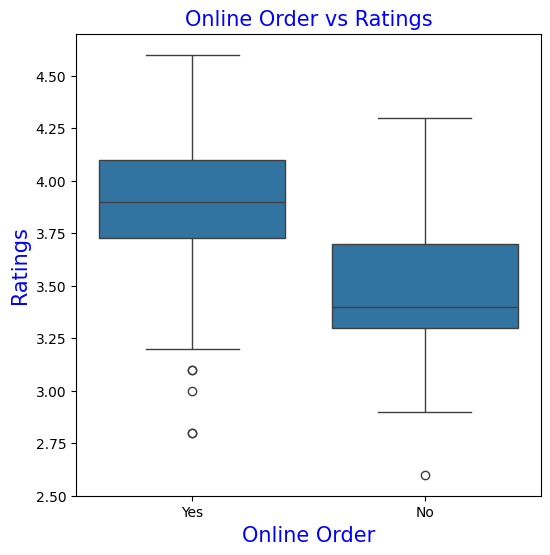

In [21]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='online_order', y='rate', data=df)
plt.title('Online Order vs Ratings',c='b',size=15)
plt.xlabel('Online Order',c='b',size=15)
plt.ylabel('Ratings',c='b',size=15)
plt.show()

Conclusion : Online mode has received maximum rating.

Offline mode has received lower rating in comparison to online order.

# Which tupe of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

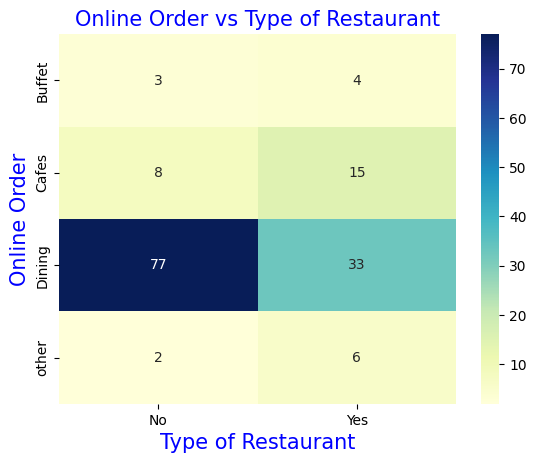

In [23]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', fill_value=0, aggfunc='size')
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Online Order vs Type of Restaurant',c='b',size=15)
plt.xlabel('Type of Restaurant',c='b',size=15)
plt.ylabel('Online Order',c='b',size=15)
plt.show()

 Conclusion : Dining restaurants has received maximum votes as compared to other types of restaurants.

This suggests that client prefer to place order online in person at restaurants, but prefer online ordering at cafes.